C:\Users\Gaurav\AppData\Local\Temp\ipykernel_200364\4062485741.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
  g_vals[:, i, j] = g_vec


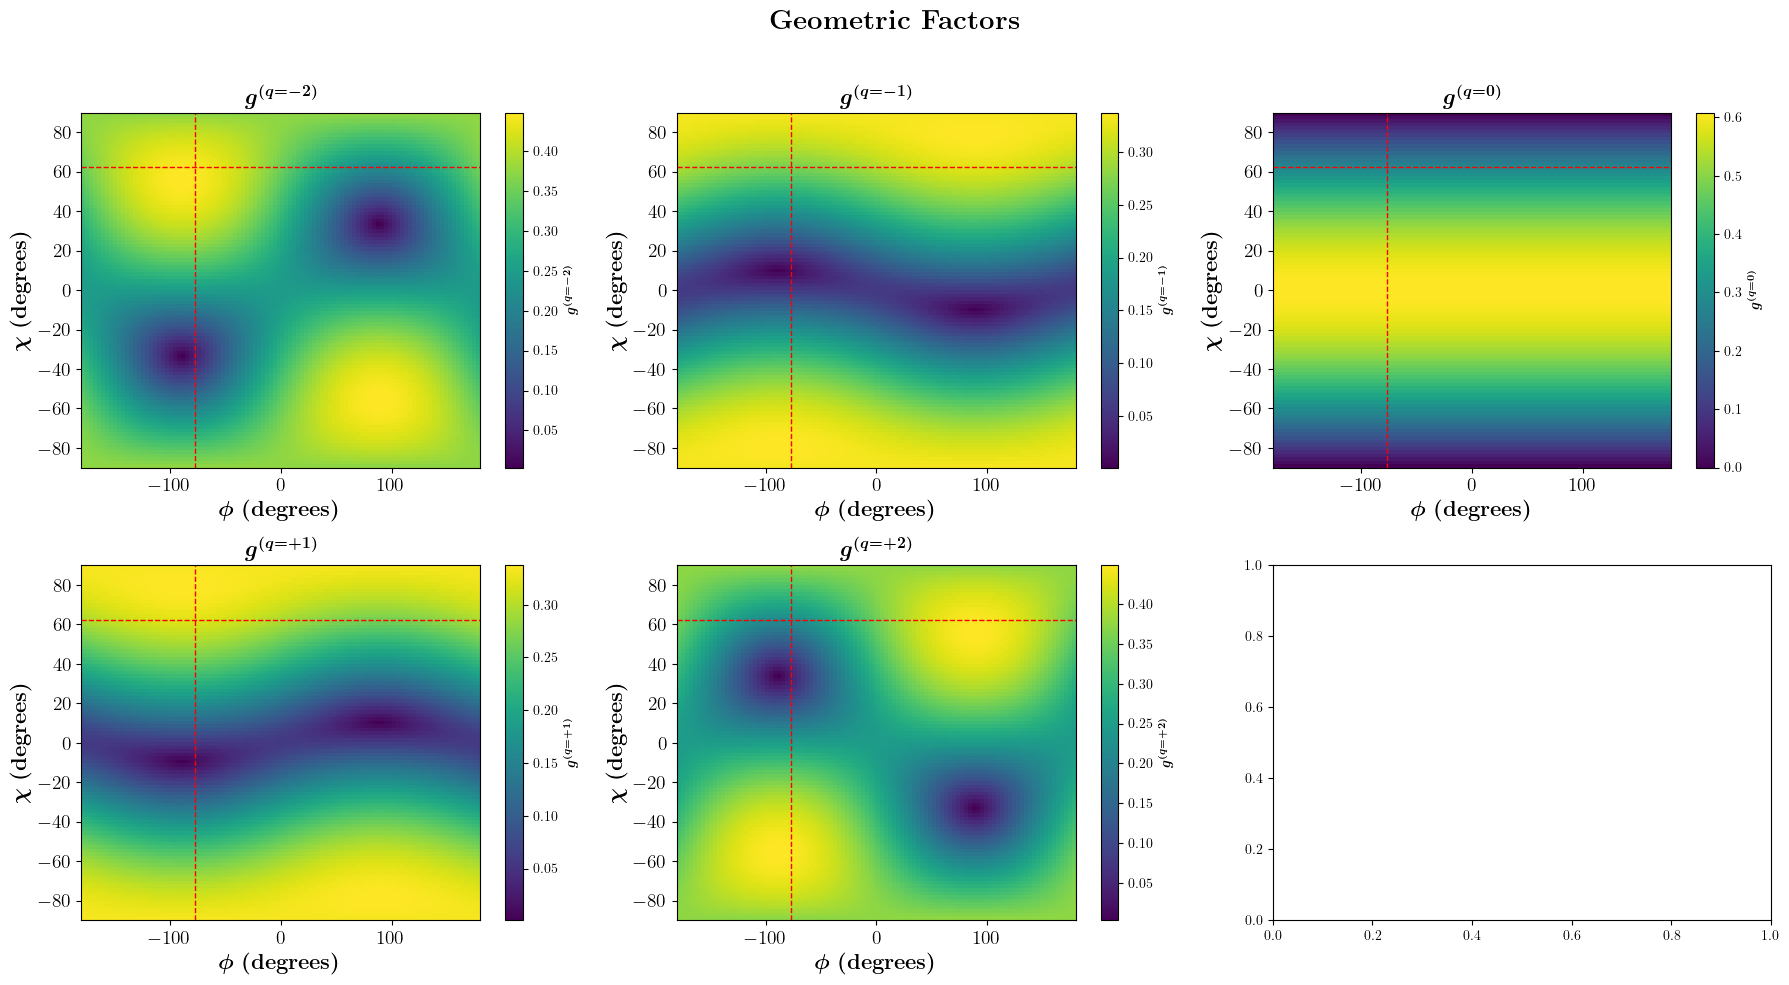

In [73]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams

# Use LaTeX-style fonts
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True

def g(theta_k, phase_val, kai_val):
    theta_k = theta_k * np.pi/180
    phase_val = phase_val * np.pi/180
    kai_val = kai_val * np.pi/180
    g = np.zeros((5), dtype=complex)

    C_0 = (np.sqrt(3/2))*(1/3) * np.array([[-1,  0, 0],
                                           [ 0, -1, 0],
                                           [ 0,  0, 2]], dtype=complex)
    
    C_p1 = (np.sqrt(3/2))*(1/np.sqrt(6)) * np.array([[ 0,   0,  -1],
                                                    [ 0,   0,  1j],
                                                    [-1,  1j,   0]], dtype=complex)
    
    C_n1 = (np.sqrt(3/2))*(1/np.sqrt(6)) * np.array([[ 0,   0,   1],
                                                    [ 0,   0,  1j],
                                                    [ 1,  1j,   0]], dtype=complex)
    
    C_p2 = (np.sqrt(3/2))*(1/np.sqrt(6)) * np.array([[ 1,   -1j, 0],
                                                    [-1j,  -1,  0],
                                                    [ 0,    0,  0]], dtype=complex)
    
    C_n2 = (np.sqrt(3/2))*(1/np.sqrt(6)) * np.array([[ 1,   1j,  0],
                                                    [1j,   -1,  0],
                                                    [ 0,    0,  0]], dtype=complex)
    
    C = [C_n2, C_n1, C_0, C_p1, C_p2]
    
    e_ll = np.array([np.cos(theta_k),
                      0,
                     -np.sin(theta_k)], dtype=complex)
    
    e_T = np.array([0,
                    1,
                    0], dtype=complex)
    
    k_vec = np.array([np.sin(theta_k), 0, np.cos(theta_k)], dtype=complex)
    
    for q in range(5):
        temp_g = 0+0j
        for i in range(3):
            for j in range(3):
                temp_g += C[q][i, j] * (
                    e_ll[i]*np.cos(kai_val) +
                    e_T[i]*np.sin(kai_val)*np.exp(1j*phase_val)
                ) * k_vec[j]
        g[q] = np.abs(temp_g)
    return g

# Set theta_k in degrees
theta_k_deg = 48.35

# Define phase and kai arrays in degrees
phase_array_deg = np.linspace(-180, 180, 100)  # in degrees
kai_array_deg = np.linspace(-90, 90, 100)      # in degrees

# Create meshgrid
Phase, Kai = np.meshgrid(phase_array_deg, kai_array_deg)

# Allocate g array
g_vals = np.zeros((5, len(kai_array_deg), len(phase_array_deg)))

# Compute g using the provided function
for i, kai in enumerate(kai_array_deg):
    for j, phase in enumerate(phase_array_deg):
        g_vec = g(theta_k_deg, phase, kai)
        g_vals[:, i, j] = g_vec

# Plotting
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()
fig.suptitle(r'\textbf{Geometric Factors}', fontsize=20)
g_label = [r'\boldmath$g^{(q = -2)}$', r'\boldmath$g^{(q = -1)}$', r'\boldmath$g^{(q = 0)}$', r'\boldmath$g^{(q = +1)}$', r'\boldmath$g^{(q = +2)}$', r'\textbf{Sum of Magnitudes}']

# for q in range(5):
#     cp = axs[q].contourf(Phase, Kai, g_vals[q], levels=50, cmap='viridis')
#     fig.colorbar(cp, ax=axs[q], label=g_label[q])
#     axs[q].set_title(g_label[q], fontsize=16)
#     axs[q].set_ylabel(r'\boldmath$\chi$ \textbf{(degrees)}', fontsize=16)
#     axs[q].set_xlabel(r'\boldmath$\phi$', fontsize=16)
#     axs[q].tick_params(axis='both', labelsize=14)

# # # Sum of magnitudes
# # sum_magnitude = np.sum(g_vals, axis=0)
# # cp = axs[5].contourf(Phase, Kai, sum_magnitude, levels=50, cmap='viridis')
# # fig.colorbar(cp, ax=axs[5], label=g_label[5])
# # axs[5].set_title(g_label[5], fontsize=16)
# # axs[5].set_ylabel(r'$\chi$', fontsize=16)
# # axs[5].set_xlabel(r'$\phi$', fontsize=16)

# # Define specific phase and kai values where you want the lines
# target_phi = -77.30   # example phase value
# target_chi = 62.48  # example kai value

# # Loop over all axes to draw lines
# for ax in axs[:-1]:
#     ax.axvline(x=target_phi, color='red', linestyle='--', linewidth=1)
#     ax.axhline(y=target_chi, color='red', linestyle='--', linewidth=1)

# plt.savefig('geometric_factor.svg')
# plt.tight_layout()
# plt.show()


# Define plotting extent for imshow
extent = [phase_array_deg[0], phase_array_deg[-1], kai_array_deg[0], kai_array_deg[-1]]

for q in range(5):
    im = axs[q].imshow(g_vals[q], extent=extent, origin='lower', aspect='auto', cmap='viridis', interpolation = 'none')
    fig.colorbar(im, ax=axs[q], label=g_label[q])
    axs[q].set_title(g_label[q], fontsize=16)
    axs[q].set_ylabel(r'\boldmath$\chi$ \textbf{(degrees)}', fontsize=16)
    axs[q].set_xlabel(r'\boldmath$\phi$ \textbf{(degrees)}', fontsize=16)
    axs[q].tick_params(axis='both', labelsize=14)

# Define specific phase and kai values where you want the lines
target_phi = -77.30
target_chi = 62.48

for ax in axs[:-1]:
    ax.axvline(x=target_phi, color='red', linestyle='--', linewidth=1)
    ax.axhline(y=target_chi, color='red', linestyle='--', linewidth=1)

plt.savefig('geometric_factor.svg')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [33]:
g_factors = g(48.35, -77.30, 62.48)
print(2*np.abs(g_factors)**2)

[0.39422056 0.14414275 0.15794373 0.2061336  0.09755935]


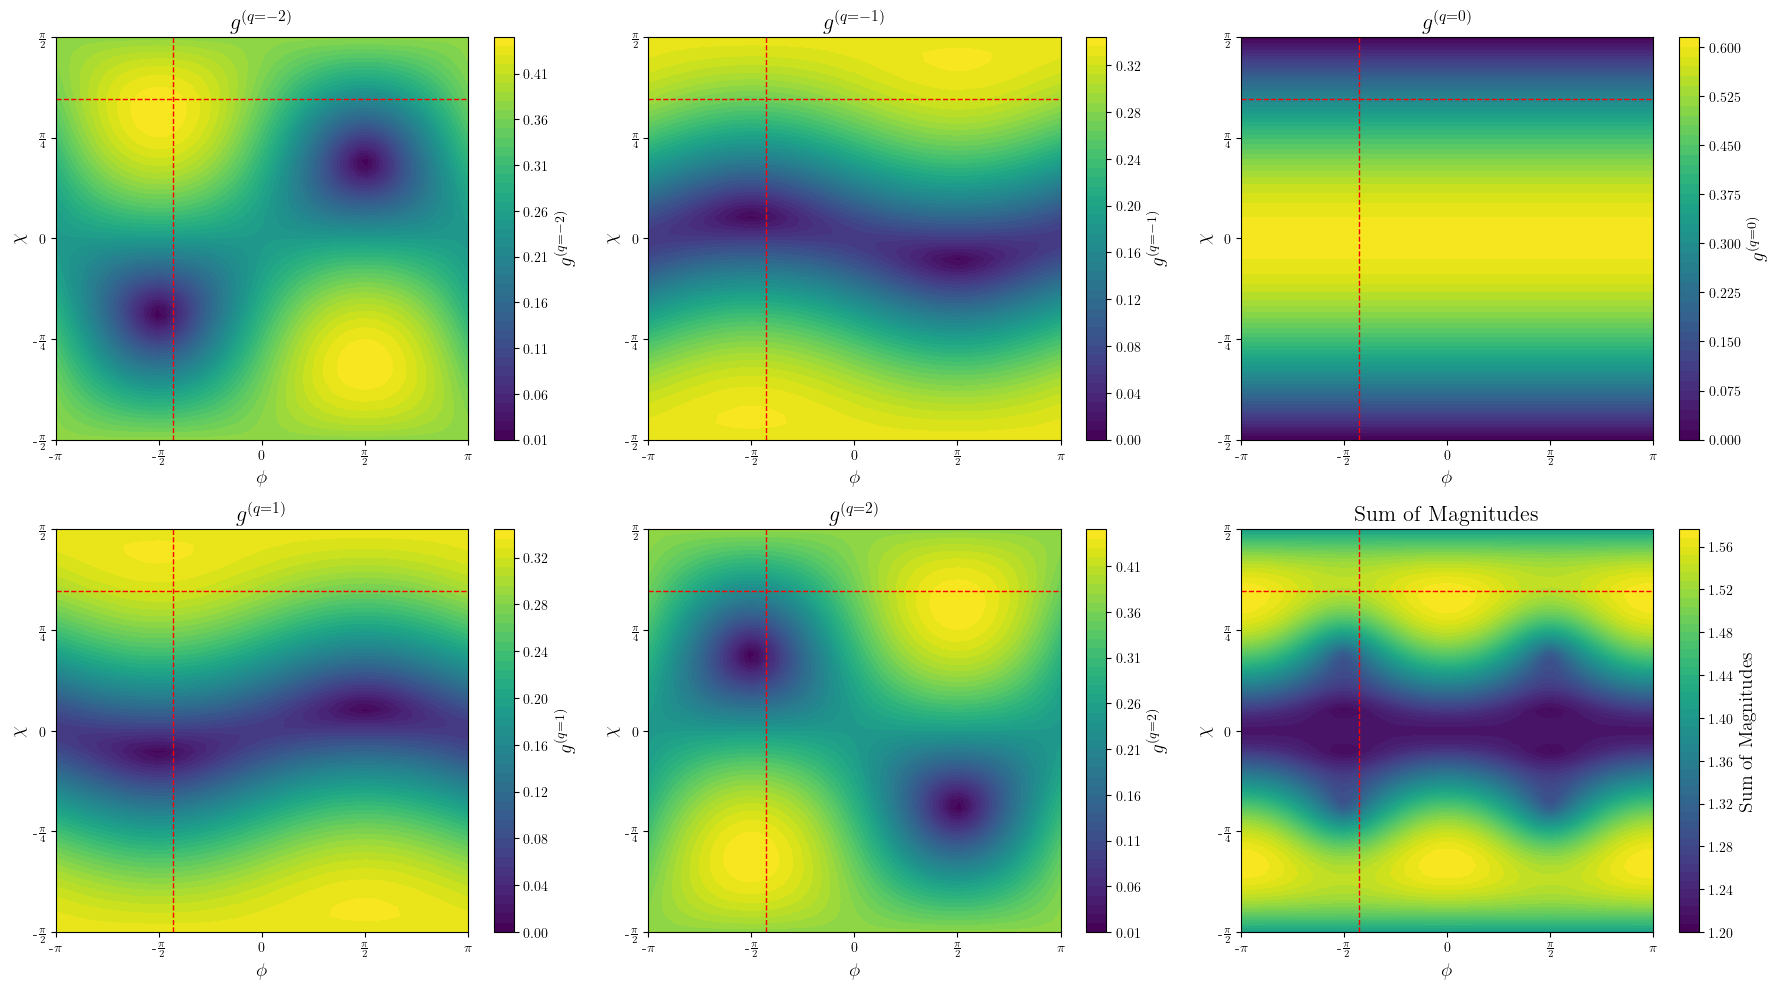

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import MultipleLocator, FuncFormatter

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True

theta_k = 48.35 * np.pi / 180
phase_array = np.linspace(-np.pi, np.pi, 50)
chi_array = np.linspace(-np.pi/2, np.pi/2, 50)

g = np.zeros((5, len(chi_array), len(phase_array)), dtype=complex)

for i_phi, phi in enumerate(phase_array):
    for i_chi, chi in enumerate(chi_array):
        g[2, i_chi, i_phi] = -np.sqrt(3 / 2) * np.cos(theta_k) * np.cos(chi) * np.sin(theta_k)
        g[3, i_chi, i_phi] = 0.5 * (np.cos(2 * theta_k) * np.cos(chi) - 1j * np.exp(1j * phi) * np.cos(theta_k) * np.sin(chi))
        g[1, i_chi, i_phi] = 0.5 * (-np.cos(2 * theta_k) * np.cos(chi) - 1j * np.exp(1j * phi) * np.cos(theta_k) * np.sin(chi))
        g[4, i_chi, i_phi] = 0.5 * np.sin(theta_k) * (np.cos(theta_k) * np.cos(chi) - 1j * np.exp(1j * phi) * np.sin(chi))
        g[0, i_chi, i_phi] = 0.5 * np.sin(theta_k) * (np.cos(theta_k) * np.cos(chi) + 1j * np.exp(1j * phi) * np.sin(chi))

def pi_formatter(x, pos):
    frac = x / np.pi
    if np.isclose(frac, 0): return r"$0$"
    if np.isclose(frac, 1): return r"$\pi$"
    if np.isclose(frac, -1): return r"-$\pi$"
    if np.isclose(frac, 0.5): return r"$\frac{\pi}{2}$"
    if np.isclose(frac, -0.5): return r"-$\frac{\pi}{2}$"
    if np.isclose(frac, 0.75): return r"$\frac{3\pi}{4}$"
    if np.isclose(frac, -0.75): return r"-$\frac{3\pi}{4}$"
    if np.isclose(frac, 0.25): return r"$\frac{\pi}{4}$"
    if np.isclose(frac, -0.25): return r"-$\frac{\pi}{4}$"
    if np.isclose(frac, 2): return r"$2\pi$"
    return r"${:.0f}\pi$".format(frac) if frac % 1 == 0 else r"${:.0f}\pi/2$".format(2 * frac)

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

labels = [
    r'$g^{(q = -2)}$', r'$g^{(q = -1)}$', 
    r'$g^{(q = 0)}$', r'$g^{(q = 1)}$', 
    r'$g^{(q = 2)}$', r'Sum of Magnitudes'
]

for q in range(5):
    mag = np.abs(g[q])
    cp = axs[q].contourf(phase_array, chi_array, mag, levels=50, cmap='viridis')
    fig.colorbar(cp, ax=axs[q]).set_label(labels[q], fontsize=14)
    axs[q].set_title(labels[q], fontsize=16)
    axs[q].set_xlabel(r'$\phi$', fontsize=14)
    axs[q].set_ylabel(r'$\chi$', fontsize=14)
    axs[q].xaxis.set_major_locator(MultipleLocator(base=np.pi / 2))
    axs[q].xaxis.set_major_formatter(FuncFormatter(pi_formatter))
    axs[q].yaxis.set_major_locator(MultipleLocator(base=np.pi / 4))
    axs[q].yaxis.set_major_formatter(FuncFormatter(pi_formatter))

sum_mag = np.sum(np.abs(g), axis=0)
cp = axs[5].contourf(phase_array, chi_array, sum_mag, levels=50, cmap='viridis')
fig.colorbar(cp, ax=axs[5]).set_label(labels[5], fontsize=14)
axs[5].set_title(labels[5], fontsize=16)
axs[5].set_xlabel(r'$\phi$', fontsize=14)
axs[5].set_ylabel(r'$\chi$', fontsize=14)
axs[5].xaxis.set_major_locator(MultipleLocator(base=np.pi / 2))
axs[5].xaxis.set_major_formatter(FuncFormatter(pi_formatter))
axs[5].yaxis.set_major_locator(MultipleLocator(base=np.pi / 4))
axs[5].yaxis.set_major_formatter(FuncFormatter(pi_formatter))

target_phi = -77.30*np.pi/180   # example phase value
target_chi = 62.48*np.pi/180  # example kai value

# Loop over all axes to draw lines
for ax in axs:
    ax.axvline(x=target_phi, color='red', linestyle='--', linewidth=1)
    ax.axhline(y=target_chi, color='red', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()
